In [86]:
import hashlib
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [87]:
hosts=["147.32.84.165","147.32.84.191","147.32.84.192","147.32.84.193","147.32.84.204","147.32.84.205",\
       "147.32.84.206","147.32.84.207","147.32.84.208","147.32.84.209"]
infectedHost = hosts[2]

In [88]:
CTU_NETFLOW_FILEPATH ="capture20110818.pcap.netflow.labeled"

COLUMNS = ["Date flow start","Durat","Prot","Src IP Addr:Port","Dst IP Addr:Port","Flags","Tos","Packets Bytes","Flows","Label","Labels"]

In [123]:
def streamFunction(amount_of_packets,CTU_NETFLOW_FILEPATH,partial,normal):
    packets =[]
    with open(CTU_NETFLOW_FILEPATH,"r") as netflow:
            #File is an Argus Unidirectional file created with ra -r so not rly csv. 
            #Let's parse by hand.
            for i,packet  in enumerate(netflow):
                #skip header
                if i == 0:
                    continue
                packet = packet.rstrip('\n')
                split_packet = packet.split("\t")
                #print(len(split_packet))
                if len(split_packet) == 1 :
                    split_packet = packet.split(" ")
                    split_packet[0]=split_packet[0]+" "+split_packet[1]
                    del split_packet[1]
                    
                if "->" in split_packet:
                    split_packet.remove("->")

                if "" in split_packet:
                    split_packet.remove("")

                
                try:
                ## Take all the ports from the ips
                    if ":" in split_packet[3]:
                        split_packet[3]= split_packet[3].split(":")[0]
                    if ":" in split_packet[4]:
                        split_packet[4]= split_packet[4].split(":")[0]
                except Exception as inst:
                    print(i)
                    print(split_packet)
                
                split_packet = [e for e in split_packet if e]
                ## select packets where split_packet[X] != 'Background'
                if split_packet[10] != 'Background':
                     ## select packets where one of the hosts(determined previously') is interacting
                    
                    if partial :
                        if split_packet[3] == infectedHost:
                            packets.append(split_packet)
                        elif split_packet[4] == infectedHost:
                            packets.append(split_packet)
                    
                    elif not partial :
                        if not normal :
                            if split_packet[3] in hosts: #== infectedHost:
                                packets.append(split_packet)
                            elif split_packet[4] in hosts : # == infectedHost:
                                packets.append(split_packet)
                        elif normal : 
                            if split_packet[3] not in hosts: #== infectedHost:
                                if split_packet[4] not in hosts:
                                    packets.append(split_packet)
                            
                            
                    #print(split_packet[0])
                    #print(split_packet[1])
                    #print(split_packet[2])
                #if  split_packet[4] not in hosts:
                 #   print(split_packet[4])
                 #   update(counterMatrix,str(split_packet[4]))
                
              

               # if i == amount_of_packets:
                #    break
    return packets

In [124]:
amount_of_packets= 19000000
dfStream = streamFunction(amount_of_packets,CTU_NETFLOW_FILEPATH,False,False)
dfInfectedHost = streamFunction(amount_of_packets,CTU_NETFLOW_FILEPATH,True,False)
dfNormalHost =  streamFunction(amount_of_packets,CTU_NETFLOW_FILEPATH,False,True)

In [125]:
dfStream

[['2011-08-18 10:20:40.906',
  '0.000',
  'TCP',
  '58.188.108.203',
  '147.32.84.208',
  'S_',
  '0',
  '1',
  '66',
  '1',
  'Botnet'],
 ['2011-08-18 10:37:58.448',
  '0.000',
  'UDP',
  '147.32.84.165',
  '147.32.80.9',
  'INT',
  '0',
  '1',
  '64',
  '1',
  'Botnet'],
 ['2011-08-18 10:37:58.448',
  '0.000',
  'UDP',
  '147.32.80.9',
  '147.32.84.165',
  'INT',
  '0',
  '1',
  '139',
  '1',
  'Botnet'],
 ['2011-08-18 10:38:00.695',
  '0.000',
  'UDP',
  '147.32.84.165',
  '147.32.80.9',
  'INT',
  '0',
  '1',
  '87',
  '1',
  'Botnet'],
 ['2011-08-18 10:38:00.705',
  '0.000',
  'UDP',
  '147.32.80.9',
  '147.32.84.165',
  'INT',
  '0',
  '1',
  '503',
  '1',
  'Botnet'],
 ['2011-08-18 10:38:00.706',
  '0.043',
  'TCP',
  '147.32.84.165',
  '74.125.232.206',
  'SRPA_',
  '0',
  '4',
  '629',
  '1',
  'Botnet '],
 ['2011-08-18 10:38:00.714',
  '0.032',
  'TCP',
  '74.125.232.206',
  '147.32.84.165',
  'SPA_',
  '0',
  '3',
  '253',
  '1',
  'Botnet'],
 ['2011-08-18 10:38:03.255',
  '

In [126]:
netflowDF=pd.DataFrame(dfStream,columns=COLUMNS)

In [127]:
hostDF=pd.DataFrame(dfInfectedHost,columns=COLUMNS)

In [128]:
normalhostDF=pd.DataFrame(dfNormalHost,columns=COLUMNS)

In [129]:
netflowDF.to_csv('allInfectedHosts.csv')
hostDF.to_csv('infectedHost.csv')
normalhostDF.to_csv('normalHost.csv')

In [130]:
hostDF['Durat'] = pd.to_numeric(hostDF['Durat'])
hostDF['Packets Bytes'] = pd.to_numeric(hostDF['Packets Bytes'])
hostDF['Flows'] = pd.to_numeric(hostDF['Flows'])
hostDF.sort_values('Packets Bytes',ascending=False)

,Date flow start,Durat,Prot,Src IP Addr:Port,Dst IP Addr:Port,Flags,Tos,Packets Bytes,Flows,Label,Labels
211,2011-08-18 11:53:11.663,4.999,UDP,147.32.84.192,147.32.96.69,INT,0,1002,788734,1,Botnet
298,2011-08-18 12:00:02.258,4.996,UDP,147.32.84.192,147.32.96.69,INT,0,1000,787148,1,Botnet
312,2011-08-18 12:01:02.345,4.997,UDP,147.32.84.192,147.32.96.69,INT,0,1000,787141,1,Botnet
311,2011-08-18 12:00:57.338,4.997,UDP,147.32.84.192,147.32.96.69,INT,0,1000,787145,1,Botnet
310,2011-08-18 12:00:52.332,4.996,UDP,147.32.84.192,147.32.96.69,INT,0,1000,787138,1,Botnet
309,2011-08-18 12:00:47.323,4.998,UDP,147.32.84.192,147.32.96.69,INT,0,1000,787149,1,Botnet
308,2011-08-18 12:00:42.315,4.997,UDP,147.32.84.192,147.32.96.69,INT,0,1000,787146,1,Botnet
307,2011-08-18 12:00:37.309,4.996,UDP,147.32.84.192,147.32.96.69,INT,0,1000,787177,1,Botnet
306,2011-08-18 12:00:32.301,4.997,UDP,147.32.84.192,147.32.96.69,INT,0,1000,787160,1,Botnet
305,2011-08-18 12:00:27.294,4.997,UDP,147.32.84.192,147.32.96.69,INT,0,1000,787169,1,Botnet


In [131]:
normalhostDF['Durat'] = pd.to_numeric(normalhostDF['Durat'])
normalhostDF['Packets Bytes'] = pd.to_numeric(normalhostDF['Packets Bytes'])
normalhostDF['Flows'] = pd.to_numeric(normalhostDF['Flows'])
normalhostDF.sort_values('Packets Bytes',ascending=False)

,Date flow start,Durat,Prot,Src IP Addr:Port,Dst IP Addr:Port,Flags,Tos,Packets Bytes,Flows,Label,Labels
242117,2011-08-18 13:53:59.960,4.996,TCP,147.32.80.13,147.32.84.194,PA_,0,16937,24972468,1,LEGITIMATE
265064,2011-08-18 14:12:52.869,3.297,TCP,147.32.84.59,74.125.218.21,_FSPA,0,11234,16999662,1,LEGITIMATE
242214,2011-08-18 13:54:04.960,2.989,TCP,147.32.80.13,147.32.84.194,PA_,0,10264,15176598,1,LEGITIMATE
242116,2011-08-18 13:53:59.954,4.967,TCP,147.32.84.194,147.32.80.13,PA_,0,9115,547455,1,LEGITIMATE
3293,2011-08-18 10:22:35.205,4.998,TCP,147.32.84.59,74.125.39.117,PA_,0,7045,10289917,1,LEGITIMATE
65307,2011-08-18 11:18:59.621,3.952,TCP,147.32.86.194,74.125.108.172,_FSPA,0,6842,10335537,1,LEGITIMATE
98996,2011-08-18 11:52:34.427,1.110,TCP,147.32.80.13,147.32.84.194,PA_,0,6551,9656591,1,LEGITIMATE
222844,2011-08-18 13:43:48.840,4.992,TCP,147.32.80.13,147.32.85.60,PA_,0,6017,8275690,1,LEGITIMATE
265555,2011-08-18 14:13:23.598,3.846,TCP,147.32.84.59,74.125.218.147,_FSPA,0,5834,8823471,1,LEGITIMATE
211635,2011-08-18 13:35:19.250,2.580,TCP,147.32.80.13,147.32.86.102,PA_,0,5744,8081377,1,LEGITIMATE


In [132]:
netflowDF['Durat'] = pd.to_numeric(netflowDF['Durat'])
netflowDF['Packets Bytes'] = pd.to_numeric(netflowDF['Packets Bytes'])
netflowDF['Flows'] = pd.to_numeric(netflowDF['Flows'])
netflowDF.sort_values('Packets Bytes',ascending=False)

,Date flow start,Durat,Prot,Src IP Addr:Port,Dst IP Addr:Port,Flags,Tos,Packets Bytes,Flows,Label,Labels
2268,2011-08-18 11:53:11.772,4.998,UDP,147.32.84.193,147.32.96.69,INT,0,1002,788724,1,Botnet
2273,2011-08-18 11:53:12.066,4.999,UDP,147.32.84.205,147.32.96.69,INT,0,1002,788731,1,Botnet
2251,2011-08-18 11:53:11.663,4.999,UDP,147.32.84.192,147.32.96.69,INT,0,1002,788734,1,Botnet
2252,2011-08-18 11:53:11.663,4.999,UDP,147.32.84.204,147.32.96.69,INT,0,1002,788743,1,Botnet
3325,2011-08-18 12:01:27.381,4.997,UDP,147.32.84.192,147.32.96.69,INT,0,1000,787142,1,Botnet
3332,2011-08-18 12:01:27.743,4.997,UDP,147.32.84.191,147.32.96.69,INT,0,1000,787157,1,Botnet
3331,2011-08-18 12:01:27.489,4.997,UDP,147.32.84.193,147.32.96.69,INT,0,1000,787139,1,Botnet
3330,2011-08-18 12:01:27.423,4.997,UDP,147.32.84.209,147.32.96.69,INT,0,1000,787159,1,Botnet
3329,2011-08-18 12:01:27.419,4.997,UDP,147.32.84.208,147.32.96.69,INT,0,1000,787151,1,Botnet
3328,2011-08-18 12:01:27.399,4.997,UDP,147.32.84.206,147.32.96.69,INT,0,1000,787126,1,Botnet


In [151]:
protTypes= pd.DataFrame(hostDF['Prot'].unique(),columns=['Prot'])
protTypes['ProtIndex'] =  np.arange(protTypes.shape[0])
hostNumericalDF = pd.merge(hostDF, protTypes,  how='left', left_on=['Prot'], right_on = ['Prot'])

flagTypes= pd.DataFrame(hostDF['Flags'].unique(),columns=['Flags'])
flagTypes['FlagIndex'] =  np.arange(flagTypes.shape[0])
hostNumericalDF = pd.merge(hostNumericalDF, flagTypes,  how='left', left_on=['Flags'], right_on = ['Flags'])

protTypes= pd.DataFrame(netflowDF['Prot'].unique(),columns=['Prot'])
protTypes['ProtIndex'] =  np.arange(protTypes.shape[0])
netflowNumericalDF = pd.merge(netflowDF, protTypes,  how='left', left_on=['Prot'], right_on = ['Prot'])

flagTypes= pd.DataFrame(netflowDF['Flags'].unique(),columns=['Flags'])
flagTypes['FlagIndex'] =  np.arange(flagTypes.shape[0])
netflowNumericalDF = pd.merge(netflowNumericalDF, flagTypes,  how='left', left_on=['Flags'], right_on = ['Flags'])

protTypes= pd.DataFrame(netflowDF['Prot'].unique(),columns=['Prot'])
protTypes['ProtIndex'] =  np.arange(protTypes.shape[0])
normalhostNumericalDF = pd.merge(normalhostDF, protTypes,  how='left', left_on=['Prot'], right_on = ['Prot'])

flagTypes= pd.DataFrame(normalhostDF['Flags'].unique(),columns=['Flags'])
flagTypes['FlagIndex'] =  np.arange(flagTypes.shape[0])
normalhostNumericalDF = pd.merge(normalhostNumericalDF, flagTypes,  how='left', left_on=['Flags'], right_on = ['Flags'])





sendingPlot = netflowNumericalDF[netflowNumericalDF['Src IP Addr:Port'] == infectedHost]
receivingPlot = netflowNumericalDF[netflowNumericalDF['Dst IP Addr:Port'] == infectedHost]

In [152]:
timeseriesHost = hostNumericalDF.set_index('Date flow start')
# attack
#start_date = '2011-08-18 11:52:59.619'
#end_date = '2011-08-18 12:08:59.694'

# normal period
start_date = '2011-08-18 11:00:59.619'
end_date = '2011-08-18 11:07:59.694'

mask = (hostNumericalDF['Date flow start'] > start_date) & (hostNumericalDF['Date flow start'] <= end_date)
hostInfo1 = hostNumericalDF.loc[mask]

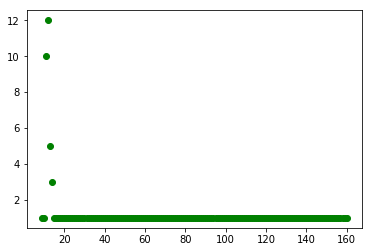

In [153]:
plt.plot(hostInfo1['Packets Bytes'],'go')

In [154]:
## COMMENT THIS |

In [155]:
timeseriesHost = hostNumericalDF.set_index('Date flow start')
# attack
#start_date = '2011-08-18 11:52:59.619'
#end_date = '2011-08-18 12:08:59.694'

# normal period
start_date = '2011-08-18 11:00:59.619'
end_date = '2011-08-18 11:07:59.694'

mask = (hostNumericalDF['Date flow start'] > start_date) & (hostNumericalDF['Date flow start'] <= end_date)
hostInfo1 = hostNumericalDF.loc[mask]

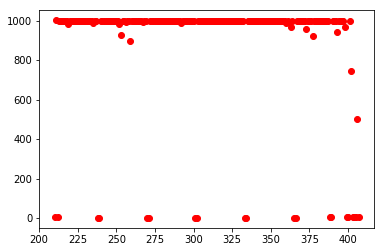

In [156]:
plt.plot(hostInfo2['Packets Bytes'],'ro')

In [157]:
#timeseriesHost = normalhostNumericalDF.set_index('Date flow start')

# attack
start_date = '2011-08-18 11:52:59.619'
end_date = '2011-08-18 12:08:59.694'

# normal period
#start_date = '2011-08-18 11:00:59.619'
#end_date = '2011-08-18 11:07:59.694'

mask = (normalhostNumericalDF['Date flow start'] > start_date) & (normalhostNumericalDF['Date flow start'] <= end_date)
normalhostInfo2 = normalhostNumericalDF.loc[mask]

Text(0.5,1,'Flags in a normal host in the attack period')

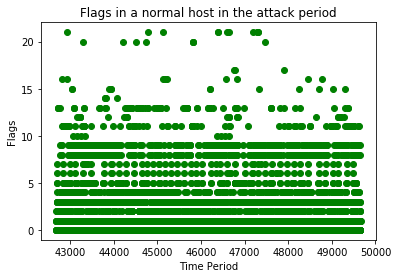

In [174]:
plt.plot(normalhostInfo2['FlagIndex'],'go')
plt.xlabel('Time Period')
plt.ylabel('Flags')
plt.title('Flags in a normal host in the attack period')

Text(0.5,1,'Packets in a normal host in the attack period')

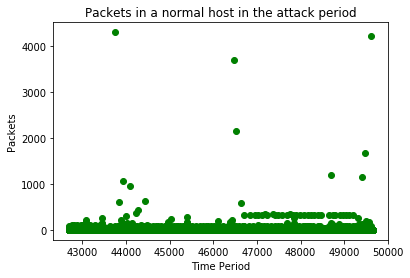

In [175]:
plt.plot(normalhostInfo2['Packets Bytes'],'go')
plt.xlabel('Time Period')
plt.ylabel('Packets')
plt.title('Packets in a normal host in the attack period')

In [176]:
#timeseries= netflowNumericalDF.set_index('Date flow start')

In [177]:
# attack
start_date = '2011-08-18 11:52:59.619'
end_date = '2011-08-18 12:08:59.694'

# normal period
#start_date = '2011-08-18 11:00:59.619'
#end_date = '2011-08-18 11:07:59.694'

mask = (netflowNumericalDF['Date flow start'] > start_date) & (netflowNumericalDF['Date flow start'] <= end_date)
temp = netflowNumericalDF.loc[mask]

Text(0.5,1,'Packets in an infected host in the attack period')

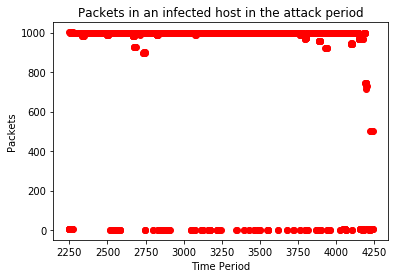

In [180]:
plt.plot(temp['Packets Bytes'],'ro')
plt.xlabel('Time Period')
plt.ylabel('Packets')
plt.title('Packets in an infected host in the attack period')

Text(0.5,1,'Flags in an infected host in the attack period')

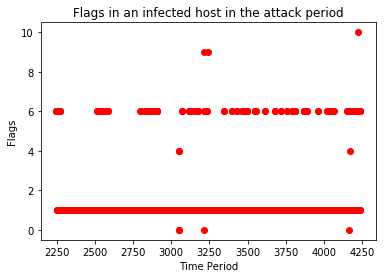

In [181]:
plt.plot(temp['FlagIndex'],'ro')
plt.xlabel('Time Period')
plt.ylabel('Flags')
plt.title('Flags in an infected host in the attack period')

Text(0,0.5,'Destination IPs')

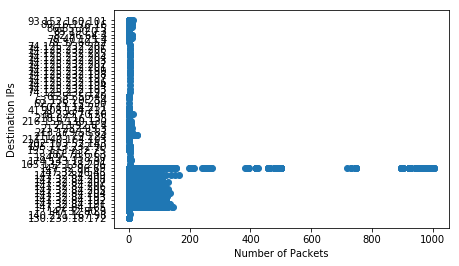

In [15]:
plt.plot(netflowNumericalDF['Packets Bytes'], netflowNumericalDF['Dst IP Addr:Port'],'o')
plt.xlabel('Number of Packets')
plt.ylabel('Destination IPs')

Text(0,0.5,'Source IPs')

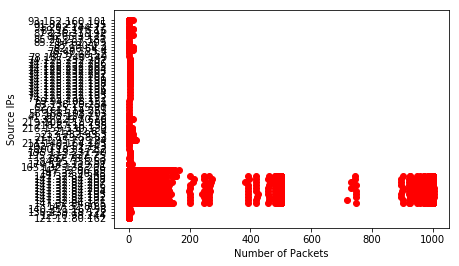

In [16]:
plt.plot(netflowNumericalDF['Packets Bytes'], netflowNumericalDF['Src IP Addr:Port'],'ro')
plt.xlabel('Number of Packets')
plt.ylabel('Source IPs')

Text(0,0.5,'Destination IPs')

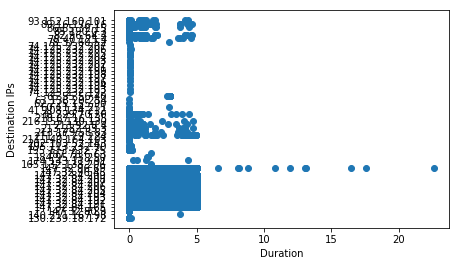

In [17]:
plt.plot(netflowNumericalDF['Durat'], netflowNumericalDF['Dst IP Addr:Port'],'o')
plt.xlabel('Duration')
plt.ylabel('Destination IPs')

Text(0,0.5,'Source IPs')

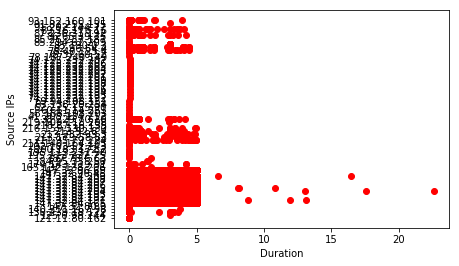

In [18]:
plt.plot(netflowNumericalDF['Durat'], netflowNumericalDF['Src IP Addr:Port'],'ro')
plt.xlabel('Duration')
plt.ylabel('Source IPs')

Text(0,0.5,'Source IPs')

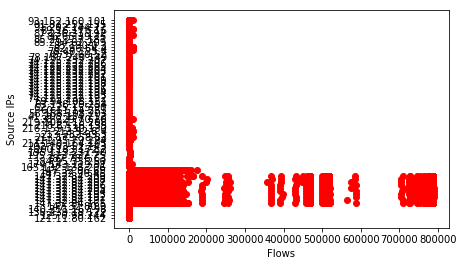

In [19]:
plt.plot(netflowNumericalDF['Flows'], netflowNumericalDF['Src IP Addr:Port'],'ro')
plt.xlabel('Flows')
plt.ylabel('Source IPs')

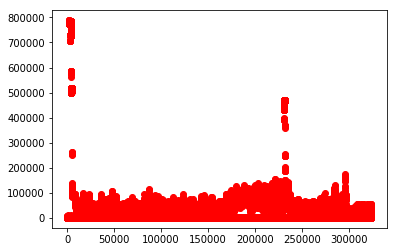

In [20]:
plt.plot(netflowNumericalDF['Flows'],'ro')

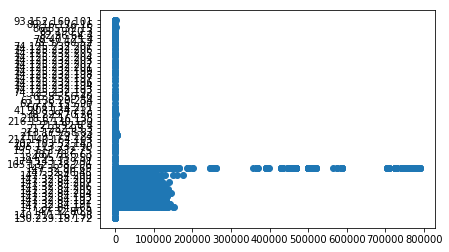

In [21]:
plt.plot(netflowNumericalDF['Flows'], netflowNumericalDF['Dst IP Addr:Port'],'o')

In [22]:
#plt.plot(netflowNumericalDF['Labels'])

In [23]:
netflowNumericalDF['Labels'].unique()

array(['Botnet', 'Botnet '], dtype=object)

In [24]:
protTypes

,Prot,ProtIndex
0,TCP,0
1,UDP,1
2,ICMP,2


In [25]:
netflowNumericalDF = netflowNumericalDF.sort_values('Date flow start')
netflowNumericalFeatures = netflowNumericalDF[['Durat','ProtIndex','Flows','Packets Bytes','FlagIndex']]

netflowNumericalFeatures.info()
netflowNumericalFeatures['Durat'] = pd.to_numeric(netflowNumericalFeatures['Durat'])
netflowNumericalFeatures['Packets Bytes'] = pd.to_numeric(netflowNumericalFeatures['Packets Bytes'])
netflowNumericalFeatures['Flows'] = pd.to_numeric(netflowNumericalFeatures['Flows'])
netflowNumericalFeatures['Label'] = 0 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323441 entries, 0 to 323440
Data columns (total 5 columns):
Durat            323441 non-null float64
ProtIndex        323441 non-null int64
Flows            323441 non-null int64
Packets Bytes    323441 non-null int64
FlagIndex        323441 non-null int64
dtypes: float64(1), int64(4)
memory usage: 14.8 MB


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

In [26]:
netflowNumericalFeatures.describe()

,Durat,ProtIndex,Flows,Packets Bytes,FlagIndex,Label
count,323441.000000,323441.000000,323441.000000,323441.000000,323441.000000,323441.0
mean,0.593597,1.942240,10365.959093,11.345151,16.521672,0.0
std,1.458396,0.318162,66730.301758,80.639121,4.970234,0.0
min,0.000000,0.000000,60.000000,1.000000,0.000000,0.0
25%,0.000000,2.000000,1066.000000,1.000000,14.000000,0.0
50%,0.000000,2.000000,1066.000000,1.000000,16.000000,0.0
75%,0.000000,2.000000,1066.000000,1.000000,19.000000,0.0
max,22.581000,2.000000,788743.000000,1002.000000,64.000000,0.0


In [27]:
X = netflowNumericalFeatures
scaler = StandardScaler()
Xstd = scaler.fit_transform(X)
#X  = scaler.transform(Xstd)

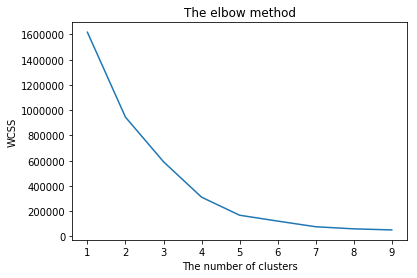

In [28]:
X = Xstd
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10), wcss)
plt.title('The elbow method')
plt.xlabel('The number of clusters')
plt.ylabel('WCSS')
plt.show()


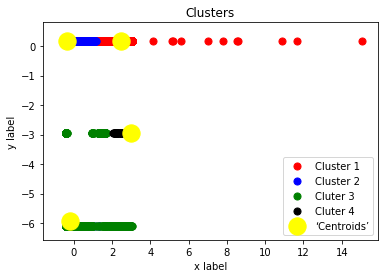

In [29]:
# Applying K-Means to the dataset on the above Elbow plot of WCSS)
# Based on the above Elbow method, we get 2 as number of optimum clusters and thus we take K as 2 for our K-Means model
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
#X = X.as_matrix(columns= X.columns)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluter 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'black', label = 'Cluter 4')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = '‘Centroids’')
plt.title('Clusters')
plt.xlabel('x label')
plt.ylabel('y label')
plt.legend()
plt.show()

In [30]:
def convertToPercentileFrame(dataframe,column,numberbin):
    toPercentile = dataframe.sort_values(column)
    toPercentile = toPercentile[column]
    vec=[]
    #vec.append(0)
    for i in range(numberbin+1):
        #print(np.percentile(toPercentile,(i/numberbin)*100))
        vec.append(np.percentile(toPercentile,(i/numberbin)*100))
    return vec

In [31]:
netflowNumericalFeatures

,Durat,ProtIndex,Flows,Packets Bytes,FlagIndex,Label
0,0.000,0,66,1,0,0
1,0.000,1,64,1,1,0
2,0.000,1,139,1,1,0
3,0.000,1,87,1,1,0
4,0.000,1,503,1,1,0
5,0.043,0,629,4,2,0
6,0.032,0,253,3,3,0
7,0.000,1,76,1,1,0
8,0.000,1,403,1,1,0
9,2.990,1,180,2,1,0


In [32]:
X = pd.DataFrame(X, columns=netflowNumericalFeatures.columns )

In [33]:
X.describe()

,Durat,ProtIndex,Flows,Packets Bytes,FlagIndex,Label
count,3.234410e+05,3.234410e+05,3.234410e+05,3.234410e+05,3.234410e+05,323441.0
mean,6.021159e-14,2.136347e-13,3.568012e-14,-1.581742e-13,-2.054661e-15,0.0
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,0.0
min,-4.070215e-01,-6.104568e+00,-1.544422e-01,-1.282897e-01,-3.324128e+00,0.0
25%,-4.070215e-01,1.815434e-01,-1.393666e-01,-1.282897e-01,-5.073555e-01,0.0
50%,-4.070215e-01,1.815434e-01,-1.393666e-01,-1.282897e-01,-1.049593e-01,0.0
75%,-4.070215e-01,1.815434e-01,-1.393666e-01,-1.282897e-01,4.986349e-01,0.0
max,1.507646e+01,1.815434e-01,1.166454e+01,1.228506e+01,9.552548e+00,0.0


In [34]:
M= []
M.append(convertToPercentileFrame(X,['Durat'],4))
M.append(convertToPercentileFrame(X,['Packets Bytes'],4))
M.append(convertToPercentileFrame(X,['Flows'],4))
#M.append(convertToPercentileFrame(X,['ProtIndex'],4))
M.append(convertToPercentileFrame(X,['FlagIndex'],4))
M


[[-0.40702151045882795,
  -0.40702151045882795,
  -0.40702151045882795,
  -0.40702151045882795,
  15.076455515864964],
 [-0.12828967977725503,
  -0.12828967977725503,
  -0.12828967977725503,
  -0.12828967977725503,
  12.285059227904222],
 [-0.15444220621562127,
  -0.13936657297752716,
  -0.13936657297752716,
  -0.13936657297752716,
  11.664539552352743],
 [-3.324128449187225,
  -0.507355469081002,
  -0.10495932906582729,
  0.4986348809569348,
  9.552548031298366]]

In [35]:
def discretizationDur(row):
    if int(row['Durat']) >= M[0][0]:
        if int(row['Durat']) <= M[0][1]:
            val = 0
            return val
    if int(row['Durat']) > M[0][1]:
        if int(row['Durat']) <= M[0][2]:
            val = 1
            return val
    if int(row['Durat']) > M[0][2]:
        if int(row['Durat']) <= M[0][3]:
            val = 2
            return val
    if int(row['Durat']) > M[0][3]:
        if int(row['Durat']) <= M[0][4]:
            val = 3
            return val

def discretizationPack(row):
    if int(row['Packets Bytes']) >= M[1][0]:
        if int(row['Packets Bytes']) <= M[1][1]:
            val = 0
            return val
    if int(row['Packets Bytes']) > M[1][1]:
        if int(row['Packets Bytes']) <= M[1][2]:
            val = 1
            return val

    if int(row['Packets Bytes']) > M[1][2]:
        if int(row['Packets Bytes']) <= M[1][3]:
            val = 2
            return val

    if int(row['Packets Bytes']) > M[1][3]:
        if int(row['Packets Bytes']) <= M[1][4]:
            val = 3
            return val
        
def discretizationFlows(row):
    if int(row['Flows']) >= M[2][0]:
        if int(row['Flows']) <= M[2][1]:
            val = 0
            return val
    if int(row['Flows']) > M[2][1]:
        if int(row['Flows']) <= M[2][2]:
            val = 1
            return val
    if int(row['Flows']) > M[2][2]:
        if int(row['Flows']) <= M[2][3]:
            val = 2
            return val
    if int(row['Flows']) > M[2][3]:
        if int(row['Flows']) <= M[2][4]:
            val = 3
            return val
        
def discretizationFlag(row):
    if int(row['FlagIndex']) >= M[3][0]:
        if int(row['FlagIndex']) <= M[3][1]:
            val = 0
            return val
    if int(row['FlagIndex']) > M[3][1]:
        if int(row['FlagIndex']) <= M[3][2]:
            val = 1
            return val
    if int(row['FlagIndex']) > M[3][2]:
        if int(row['FlagIndex']) <= M[3][3]:
            val = 2
            return val
    if int(row['FlagIndex']) > M[3][3]:
        if int(row['FlagIndex']) <= M[3][4]:
            val = 3
            return val

In [36]:
df = X
df['DuratDisc'] = df.apply(discretizationDur, axis=1)

df['FlowsDisc'] = df.apply(discretizationFlows, axis=1)

df['PacketsDisc'] = df.apply(discretizationPack, axis=1)


df['FlagsDisc'] = df.apply(discretizationFlag, axis=1)




In [37]:
df.to_csv('datasettotest.csv')

In [38]:
df.describe()

,Durat,ProtIndex,Flows,Packets Bytes,FlagIndex,Label,DuratDisc,FlowsDisc,PacketsDisc,FlagsDisc
count,3.234410e+05,3.234410e+05,3.234410e+05,3.234410e+05,3.234410e+05,323441.0,323441.0,323441.0,323441.0,323441.000000
mean,6.021159e-14,2.136347e-13,3.568012e-14,-1.581742e-13,-2.054661e-15,0.0,3.0,3.0,3.0,1.962503
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,0.0,0.0,0.0,0.0,0.465974
min,-4.070215e-01,-6.104568e+00,-1.544422e-01,-1.282897e-01,-3.324128e+00,0.0,3.0,3.0,3.0,0.000000
25%,-4.070215e-01,1.815434e-01,-1.393666e-01,-1.282897e-01,-5.073555e-01,0.0,3.0,3.0,3.0,2.000000
50%,-4.070215e-01,1.815434e-01,-1.393666e-01,-1.282897e-01,-1.049593e-01,0.0,3.0,3.0,3.0,2.000000
75%,-4.070215e-01,1.815434e-01,-1.393666e-01,-1.282897e-01,4.986349e-01,0.0,3.0,3.0,3.0,2.000000
max,1.507646e+01,1.815434e-01,1.166454e+01,1.228506e+01,9.552548e+00,0.0,3.0,3.0,3.0,3.000000


In [39]:
X.describe()

,Durat,ProtIndex,Flows,Packets Bytes,FlagIndex,Label,DuratDisc,FlowsDisc,PacketsDisc,FlagsDisc
count,3.234410e+05,3.234410e+05,3.234410e+05,3.234410e+05,3.234410e+05,323441.0,323441.0,323441.0,323441.0,323441.000000
mean,6.021159e-14,2.136347e-13,3.568012e-14,-1.581742e-13,-2.054661e-15,0.0,3.0,3.0,3.0,1.962503
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,0.0,0.0,0.0,0.0,0.465974
min,-4.070215e-01,-6.104568e+00,-1.544422e-01,-1.282897e-01,-3.324128e+00,0.0,3.0,3.0,3.0,0.000000
25%,-4.070215e-01,1.815434e-01,-1.393666e-01,-1.282897e-01,-5.073555e-01,0.0,3.0,3.0,3.0,2.000000
50%,-4.070215e-01,1.815434e-01,-1.393666e-01,-1.282897e-01,-1.049593e-01,0.0,3.0,3.0,3.0,2.000000
75%,-4.070215e-01,1.815434e-01,-1.393666e-01,-1.282897e-01,4.986349e-01,0.0,3.0,3.0,3.0,2.000000
max,1.507646e+01,1.815434e-01,1.166454e+01,1.228506e+01,9.552548e+00,0.0,3.0,3.0,3.0,3.000000


In [57]:
X['Disc'] = X[['FlagsDisc','PacketsDisc']].dot([10,1])

In [58]:
X

,Durat,ProtIndex,Flows,Packets Bytes,FlagIndex,Label,DuratDisc,FlowsDisc,PacketsDisc,FlagsDisc,Disc
0,-0.407022,-6.104568,-0.154352,-0.128290,-3.324128,0.0,3,3,3,0,3
1,-0.407022,-2.961512,-0.154382,-0.128290,-3.122930,0.0,3,3,3,0,3
2,-0.407022,-2.961512,-0.153258,-0.128290,-3.122930,0.0,3,3,3,0,3
3,-0.407022,-2.961512,-0.154038,-0.128290,-3.122930,0.0,3,3,3,0,3
4,-0.407022,-2.961512,-0.147804,-0.128290,-3.122930,0.0,3,3,3,0,3
5,-0.377537,-6.104568,-0.145915,-0.091087,-2.921732,0.0,3,3,3,0,3
6,-0.385080,-6.104568,-0.151550,-0.103488,-2.720534,0.0,3,3,3,0,3
7,-0.407022,-2.961512,-0.154202,-0.128290,-3.122930,0.0,3,3,3,0,3
8,-0.407022,-2.961512,-0.149302,-0.128290,-3.122930,0.0,3,3,3,0,3
9,1.643180,-2.961512,-0.152644,-0.115889,-3.122930,0.0,3,3,3,0,3


In [203]:
# attack
start_date =2250 #'2011-08-18 11:52:59.619'
end_date = 5000#'2011-08-18 12:08:59.694'

# normal period
#start_date = '2011-08-18 11:00:59.619'
#end_date = '2011-08-18 11:07:59.694'
dfDisc= df.iloc[start_date:end_date]
#mask = (df > start_date) & (df <= end_date)
#dfDisc = df.loc[mask]

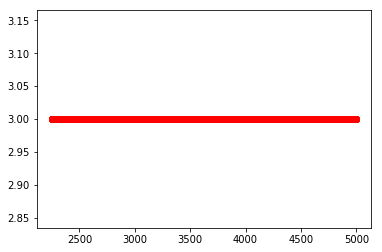

In [204]:
plt.plot(dfDisc['Disc'],'ro')

In [205]:
start_date = 5000#'2011-08-18 11:00:59.619'
end_date = 10000#'2011-08-18 11:07:59.694'
dfDisc= df.iloc[start_date:end_date]

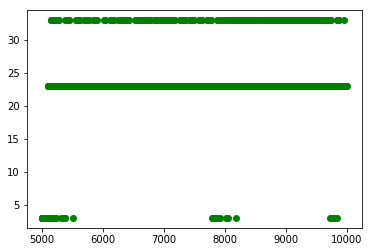

In [206]:
plt.plot(dfDisc['Disc'],'go')

,Durat,ProtIndex,Flows,Packets Bytes,FlagIndex,Label,DuratDisc,FlowsDisc,PacketsDisc,FlagsDisc,Disc
200,-0.407022,-6.104568,-0.154232,-0.12829,-3.324128,0.0,3,3,3,0,3
201,-0.407022,-6.104568,-0.154442,-0.12829,-2.519336,0.0,3,3,3,0,3
202,-0.407022,-6.104568,-0.154232,-0.12829,-3.324128,0.0,3,3,3,0,3
203,-0.407022,-6.104568,-0.154232,-0.12829,-3.324128,0.0,3,3,3,0,3
204,-0.407022,-6.104568,-0.154232,-0.12829,-3.324128,0.0,3,3,3,0,3
205,-0.407022,-6.104568,-0.154232,-0.12829,-3.324128,0.0,3,3,3,0,3
206,-0.407022,-6.104568,-0.154232,-0.12829,-3.324128,0.0,3,3,3,0,3
207,-0.407022,-6.104568,-0.154232,-0.12829,-3.324128,0.0,3,3,3,0,3
208,-0.407022,-6.104568,-0.154442,-0.12829,-2.519336,0.0,3,3,3,0,3
209,-0.407022,-6.104568,-0.154442,-0.12829,-2.519336,0.0,3,3,3,0,3


,Durat,ProtIndex,Flows,Packets Bytes,FlagIndex,Label,DuratDisc,FlowsDisc,PacketsDisc,FlagsDisc,Disc
200,-0.407022,-6.104568,-0.154232,-0.12829,-3.324128,0.0,3,3,3,0,3
201,-0.407022,-6.104568,-0.154442,-0.12829,-2.519336,0.0,3,3,3,0,3
202,-0.407022,-6.104568,-0.154232,-0.12829,-3.324128,0.0,3,3,3,0,3
203,-0.407022,-6.104568,-0.154232,-0.12829,-3.324128,0.0,3,3,3,0,3
204,-0.407022,-6.104568,-0.154232,-0.12829,-3.324128,0.0,3,3,3,0,3
205,-0.407022,-6.104568,-0.154232,-0.12829,-3.324128,0.0,3,3,3,0,3
206,-0.407022,-6.104568,-0.154232,-0.12829,-3.324128,0.0,3,3,3,0,3
207,-0.407022,-6.104568,-0.154232,-0.12829,-3.324128,0.0,3,3,3,0,3
208,-0.407022,-6.104568,-0.154442,-0.12829,-2.519336,0.0,3,3,3,0,3
209,-0.407022,-6.104568,-0.154442,-0.12829,-2.519336,0.0,3,3,3,0,3


In [ ]:
def netflowEncoding(netflow,attributeMap,nfeatures):
    code = 0
    spaceSize= 1
    for j in range (nfeatures):
        spaceSize = spaceSize * len(attributeMap[j]) # piatorio Mi where Mi : v -> N
    for i in range (nfeatures):
        print(netflowNumericalFeatures.iloc[:,i])
        code = code + attributeMap[i]*(netflow.iloc[:,i]) * spacesize/ mod(attributeMap(i))
        #spaceSize= spaceSize / mod(attributeMap(i))
    return code